Word2Vec is a popular technique in Natural Language Processing (NLP) for learning word embeddings.

These embeddings are dense vectors that capture the semantic meaning of words.

For example:

**Similarity:** Words that have similar meanings or are used in similar contexts are considered semantically similar. For example, "king" and "queen" are semantically similar because they both refer to royalty.

**Synonymy:** Words that are synonymous share a similar meaning. For instance, "happy" and "joyful" are synonyms and would be close to each other in a semantic space.

**Antonymy:** Words that have opposite meanings are antonyms. While they are semantically related, their meanings are opposite (e.g., "hot" vs. "cold"). In a semantic space, antonyms may be close but with opposing directions.

**Contextual Usage:** Words that appear in similar contexts often have related meanings. For example, "doctor" and "nurse" often appear together in medical contexts and thus have a semantic relationship.

**Conceptual Relationships:** Some words are related through broader conceptual links, like "apple" and "fruit," where one is a type of the other.



Introduced by Google in 2013, Word2Vec has two main architectures for generating these word vectors:

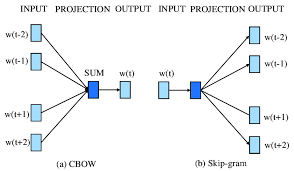

## 1. Skip-Gram Model

**Objective:** The goal of the Skip-Gram model is to predict the context words given a target word.

**Training Process:**

For a given target word in a sentence, the model tries to predict the surrounding context words within a certain window size.

For example, if the sentence is "The cat sat on the mat" and
 the target word is "sat" with a window size of 2, the context words would be "cat," "on," "the," and "mat."

The model learns to maximize the probability of these context words given the target word. The optimization involves adjusting the weights of the neural network to minimize the loss function, which typically measures the difference between the predicted and actual context words.


Architecture: The neural network used is a simple feedforward neural network with a single hidden layer. The input is the one-hot encoded vector of the target word, and the output is the probability distribution over all words in the vocabulary.




## Example Sentence:

**Consider the sentence:**

    -  "The quick brown fox jumps over the lazy dog."

**Step-by-Step Process:**

- Choose the Target Word:

- Let's select "quick" as our target word.


**Define the Context Window Size:**

- Assume the context window size is 2.

- This means we will ll consider the two words before and the two words after the target word as the context.

- For the target word "quick," the context words are:

    -  Before: "The"

    -  After: "brown", "fox"


- Therefore, the context words for "quick" are ["The", "brown", "fox"].

**Training Data Generation:**

- The Skip-Gram model generates (target, context) pairs for training.

- For the word "quick," the training pairs would be:
        ("quick", "The")
        ("quick", "brown")
        ("quick", "fox")

**Model Structure:**

- Input Layer: The input is a one-hot encoded vector representing the target word "quick." Suppose the vocabulary size is 10,000; this vector will be 10,000-dimensional, with a 1 at the index corresponding to "quick" and 0s elsewhere.

- Hidden Layer: The hidden layer size determines the dimensionality of the word embeddings. Lets say we choose 300 dimensions. The input vector is multiplied by the weight matrix to produce a 300-dimensional vector.

- Output Layer: The output is a softmax layer that predicts the probability distribution over the entire vocabulary. The model tries to maximize the probability of the correct context word given the target word.

**Training the Model:**

The model adjusts its weights to increase the probability of the actual context words. For example, for the pair ("quick", "The"), the model is trained to increase the probability of predicting "The" when the input is "quick."

This process is repeated for each context word, adjusting the weights through backpropagation and updating them using an optimization algorithm like Stochastic Gradient Descent (SGD).

**Resulting Word Embeddings:**

After training on many such (target, context) pairs, the model learns word embeddings that capture the relationships between words. Words that appear in similar contexts will have similar vector representations in the embedding space.

**Continuous Bag of Words (CBOW):**

-  Predicts the target word (center word) from the context words (surrounding words).

- Skip-Gram: Predicts the context words from the target word (center word).


In [ ]:
!pip install gensim

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

$Step-2$

**Prepare the data**

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample corpus
corpus = [
    "I love machine learning",
    "Machine learning is amazing",
    "Natural Language Processing is a part of machine learning",
    "Word2Vec is used in many NLP tasks"
]

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
tokenized_corpus

[['i', 'love', 'machine', 'learning'],
 ['machine', 'learning', 'is', 'amazing'],
 ['natural',
  'language',
  'processing',
  'is',
  'a',
  'part',
  'of',
  'machine',
  'learning'],
 ['word2vec', 'is', 'used', 'in', 'many', 'nlp', 'tasks']]

$Step-3$

**Train the word2vec model**

In [ ]:
# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=2, min_count=1, sg=0)

# sg=0 for CBOW, sg=1 for Skip-Gram
#vector_size=100: The number of dimensions of the word vectors.
#window=2: The maximum distance between the current and predicted word within a sentence.
#min_count=1: Ignores all words with total frequency lower than this.
#sg=0: Specifies the training algorithm (0 for CBOW, 1 for Skip-Gram).

$Step-4$

**Explore the vectors**

In [ ]:
# Get the vector for a word
vector = model.wv['machine']
print("Vector for 'machine':", vector)

# Find similar words
similar_words = model.wv.most_similar('machine', topn=5)
print("Words similar to 'machine':", similar_words)


Vector for 'machine': [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -

**Step 5: Save and Load the Model**

In [ ]:
# Save the model
model.save("word2vec.model")

# Load the model
loaded_model = Word2Vec.load("word2vec.model")


In [ ]:
loaded_model.wv['machine']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [ ]:
# Get the list of words in the vocabulary
vocabulary_list = list(model.wv.index_to_key)

# Print the vocabulary
print(vocabulary_list)


['machine', 'learning', 'is', 'tasks', 'nlp', 'love', 'amazing', 'natural', 'language', 'processing', 'a', 'part', 'of', 'word2vec', 'used', 'in', 'many', 'i']


**Step-6**

**Cretae sentence vectors**

**Word Vector:**

-  The Word2Vec model learns a vector for each word, representing its semantic meaning in a high-dimensional space.

**Sentence Vector:**

-  To represent a sentence, we average the vectors of all the words in the sentence. This vector summarizes the sentence's meaning in the same 100-dimensional space.

In [ ]:
tokenized_corpus[0]

['i', 'love', 'machine', 'learning']

In [ ]:
import numpy as np

sentence_vector = np.mean(
    [model.wv[word] for word in tokenized_corpus[0]],
    axis=0
)
print(len(sentence_vector))


100


In [ ]:
## Original model##

## Original model##

In [ ]:
import gensim.downloader as api
wv=api.load("word2vec-google-news-300")
wv

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#from gensim.models import Word2Vec

In [ ]:
#dir(Word2Vec)

In [ ]:
vec_king=wv['king']
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
vec_king.shape  # on 300 contextual feature the model is trained

(300,)

In [ ]:
wv.similarity('king','queen')  # cosine similairt two words
wv.similarity('good','bad')

0.7190051

In [ ]:
wv.similarity()

- take the king vector seperately

- also queen vector

- Will perform the Cosine similarity

In [ ]:
vec_king=wv['king']
vec_queen=wv['queen']

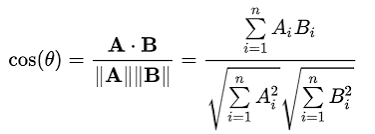

In [ ]:
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or arra

# compute cosine similarity
cosine = np.dot(vec_king,vec_queen)/(norm(vec_king)*norm(vec_queen))
print("Cosine Similarity:", cosine)

Cosine Similarity: 0.6510956


In [ ]:
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [ ]:
wv.most_similar('Telanagana')

[('Telangana', 0.7098552584648132),
 ('Telengana', 0.7074891328811646),
 ('Seema_Andhra', 0.6626746654510498),
 ('Telangana_protagonists', 0.6453095078468323),
 ('TDP_politburo_member', 0.6418837308883667),
 ('Madhu_Yashki', 0.6368694305419922),
 ('Telangana_JAC', 0.6334327459335327),
 ('Telangana_Rashtra_Samiti', 0.6320290565490723),
 ('Telangana_Rashtra_Samithi', 0.6315802335739136),
 ('Rayalseema', 0.6294906735420227)]

https://github.com/piskvorky/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
wv.most_similar('moye moye') # It is not in the list

KeyError: "Key 'moye moye' not present in vocabulary"

In [ ]:
wv.most_similar('sachin')

[('tendulkar', 0.7856917381286621),
 ('ganguly', 0.7785738706588745),
 ('sehwag', 0.7773319482803345),
 ('dravid', 0.7691141366958618),
 ('sachin_tendulkar', 0.741614580154419),
 ('laxman', 0.7271499037742615),
 ('KrisSrikkanth_says', 0.6995106339454651),
 ('murali', 0.6993196606636047),
 ('afridi', 0.6891643404960632),
 ('odi', 0.6883801817893982)]

In [ ]:
dir(wv)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [ ]:
wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4